In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [2]:
#import the sequencing yield datasheet
seqqc = pd.read_csv('../Supp_tables/Table_S5_nanoplot_full.csv')

In [3]:
sns.__version__

'0.13.2'

In [4]:
##select original samples PB (n-88) ONT (n=122)
#selects all files that are non concatenated
seq_org=seqqc.loc[seqqc['concat']==0]

#selects files which are not subsampled
seq_o=seq_org.loc[seq_org['subsample']==0]


#removes the RBK ONT runs - goal is to only compare ligation
seq_lig=seq_o.loc[seq_o['RBK']!=1]
seq_lig.shape

(169, 31)

In [5]:
#creates a df for pb only
pb=seq_lig.loc[seq_lig['platform']=="pb"]
pb.describe()

,RBK,RL_mean,RQ_mean,RL_median,RQ_median,Total_reads,RL_n50,RL_stdev,Total_bases,total_Gb,RL_max,hsid,concat,hybrid,subsample,ONT_Q20,dna_extraction_date,cleanup_date,cleanup_method,lib_prep_kit
count,0.0,88.000000,88.000000,88.000000,88.000000,8.800000e+01,88.000000,88.000000,8.800000e+01,88.000000,88.000000,88.000000,88.0,88.0,88.0,88.0,0.0,0.0,0.0,0.0
mean,NaN,8247.238636,29.329545,7347.159091,37.272727,7.864864e+05,9663.363636,4091.840909,6.249187e+09,6.249193,39378.852273,656.897727,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
std,NaN,1588.204053,1.047401,1843.440093,1.686507,7.923540e+05,1867.545498,740.859316,5.988933e+09,5.988945,8413.832371,107.460342,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,NaN,4089.000000,27.000000,3114.000000,33.000000,5.698000e+03,4707.000000,2675.000000,2.329896e+07,0.023000,24180.000000,526.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
25%,NaN,7225.000000,29.000000,6148.000000,36.000000,2.406010e+05,8463.000000,3553.750000,1.751217e+09,1.751250,33883.750000,549.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
50%,NaN,8107.000000,29.000000,7152.000000,37.000000,6.068650e+05,9315.500000,3977.500000,5.078688e+09,5.079000,37788.000000,651.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
75%,NaN,9270.000000,30.000000,8452.250000,39.000000,9.940970e+05,11036.500000,4533.500000,8.539455e+09,8.539500,41659.500000,791.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
max,NaN,13764.000000,32.000000,12237.000000,40.000000,4.564191e+06,15960.000000,7234.000000,3.453776e+10,34.538000,62253.000000,798.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#creates a df with ont only
ont=seq_lig.loc[seq_lig['platform']=="ont"]
ont.describe()

,RBK,RL_mean,RQ_mean,RL_median,RQ_median,Total_reads,RL_n50,RL_stdev,Total_bases,total_Gb,RL_max,hsid,concat,hybrid,subsample,ONT_Q20,dna_extraction_date,cleanup_date,cleanup_method,lib_prep_kit
count,0.0,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.0,0.0,0.0,0.0,0.0
mean,NaN,4204.962963,15.481481,2224.839506,17.234568,2.895638e+06,8712.086420,5924.716049,1.052750e+10,10.527531,239390.185185,648.333333,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
std,NaN,3043.424155,0.895979,2139.306029,1.267592,4.509746e+06,5979.360616,3065.372062,1.682119e+10,16.821187,158344.715278,104.739916,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,NaN,1040.000000,12.000000,372.000000,12.000000,2.400000e+02,1508.000000,1431.000000,5.894310e+05,0.001000,47389.000000,526.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
25%,NaN,2380.000000,15.000000,1010.000000,16.000000,4.141780e+05,4797.000000,4066.000000,1.420598e+09,1.421000,154291.000000,549.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
50%,NaN,3439.000000,16.000000,1640.000000,18.000000,1.244048e+06,6815.000000,4968.000000,4.122628e+09,4.123000,198524.000000,603.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
75%,NaN,4893.000000,16.000000,2716.000000,18.000000,3.372119e+06,9896.000000,7131.000000,1.076230e+10,10.762000,248994.000000,742.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
max,NaN,16471.000000,17.000000,12788.000000,19.000000,2.441848e+07,28640.000000,15936.000000,8.399568e+10,83.996000,911457.000000,798.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/321664911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.boxplot(data=seq_lig, x="platform", y="RL_mean", palette=['blue','magenta'])


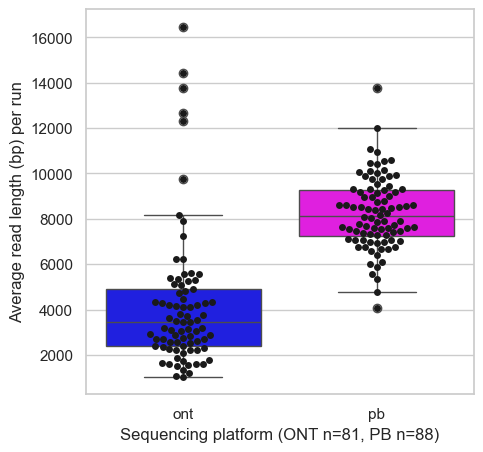

In [15]:
plt.subplots(figsize=(5,5))
a=sns.boxplot(data=seq_lig, x="platform", y="RL_mean", palette=['blue','magenta'])
a=sns.swarmplot(data=seq_lig, x="platform", y="RL_mean", color="k", size=5, dodge=True)
a.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Average read length (bp) per run')
plt.savefig("Supp_Fig1J_RL_mean.png", dpi=600, bbox_inches='tight')



/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/63099079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.boxplot(data=seq_lig, x="platform", y="RL_median", palette=['blue','magenta'])


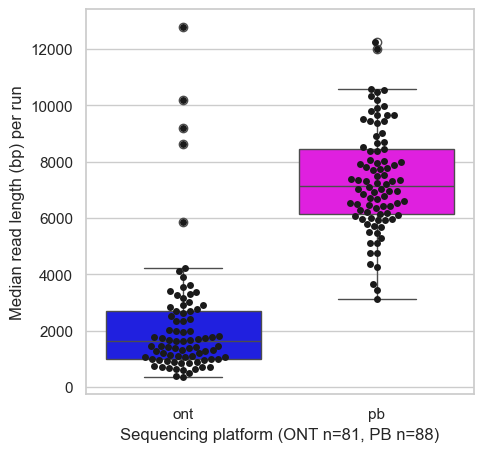

In [16]:
plt.subplots(figsize=(5,5))
b=sns.boxplot(data=seq_lig, x="platform", y="RL_median", palette=['blue','magenta'])
b=sns.swarmplot(data=seq_lig, x="platform", y="RL_median", color="k", size=5, dodge=True)
b.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Median read length (bp) per run')
plt.savefig("Supp_Fig1K_RL_median.png", dpi=600,bbox_inches='tight')


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/2444562557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c=sns.boxplot(data=seq_lig, x="platform", y="RL_n50", palette=['blue','magenta'])


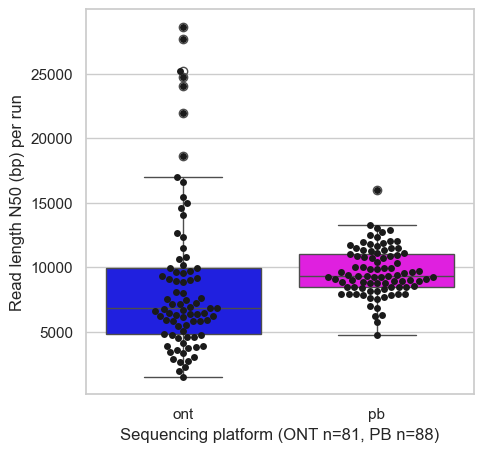

In [17]:
plt.subplots(figsize=(5,5))
c=sns.boxplot(data=seq_lig, x="platform", y="RL_n50", palette=['blue','magenta'])
c=sns.swarmplot(data=seq_lig, x="platform", y="RL_n50", color="k", size=5, dodge=True)
c.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Read length N50 (bp) per run')
plt.savefig("Supp_Fig1L_RL_n50.png", dpi=600,bbox_inches='tight')


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/3871061404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  d=sns.boxplot(data=seq_lig, x="platform", y="RL_max", palette=['blue','magenta'])
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


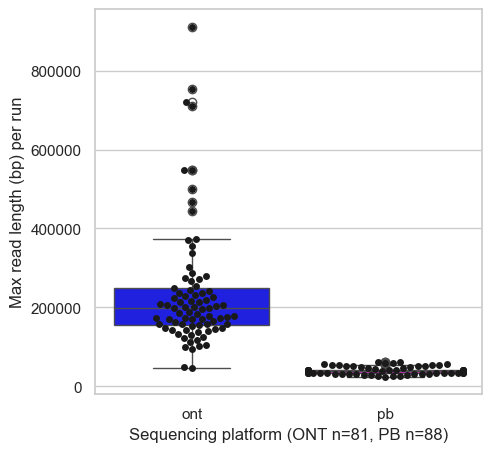

In [18]:
plt.subplots(figsize=(5,5))
d=sns.boxplot(data=seq_lig, x="platform", y="RL_max", palette=['blue','magenta'])
d=sns.swarmplot(data=seq_lig, x="platform", y="RL_max", color="k", size=5, dodge=True)
d.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Max read length (bp) per run')
plt.savefig("Supp_Fig1M_RL_max.png", dpi=600,bbox_inches='tight')


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/3298869959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  e=sns.boxplot(data=seq_lig, x="platform", y="total_Gb", palette=['blue','magenta'])


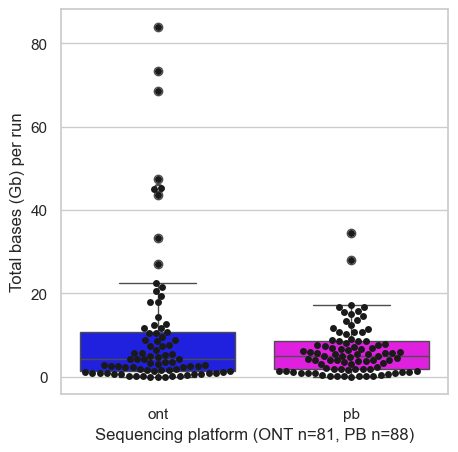

In [19]:
plt.subplots(figsize=(5,5))
e=sns.boxplot(data=seq_lig, x="platform", y="total_Gb", palette=['blue','magenta'])
e=sns.swarmplot(data=seq_lig, x="platform", y="total_Gb", color="k", size=5, dodge=True)
e.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Total bases (Gb) per run')
plt.savefig("Supp_Fig1H_total_Gb.png", dpi=600,bbox_inches='tight')


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_89793/2465478319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.boxplot(data=seq_lig, x="platform", y="RQ_median", palette=['blue','magenta'])
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


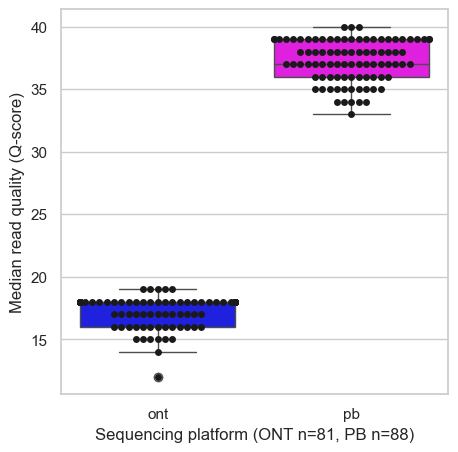

In [20]:
plt.subplots(figsize=(5,5))
g=sns.boxplot(data=seq_lig, x="platform", y="RQ_median", palette=['blue','magenta'])
g=sns.swarmplot(data=seq_lig, x="platform", y="RQ_median", color="k", size=5, dodge=True)
g.set(xlabel='Sequencing platform (ONT n=81, PB n=88)', ylabel='Median read quality (Q-score)')
plt.savefig("Supp_Fig1I_RQ_median.png", dpi=600,bbox_inches='tight')

In [13]:
##Stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html


ont.describe()
stats.mannwhitneyu(ont['total_Gb'],pb['total_Gb'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=3538.0, pvalue=0.9360416180844572)


stats.mannwhitneyu(ont['RQ_median'],pb['RQ_median'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=0.0, pvalue=8.397335790613436e-30)


stats.mannwhitneyu(ont['RL_max'],pb['RL_max'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=7098.0, pvalue=1.0077321922485458e-28)



stats.mannwhitneyu(ont['RL_mean'],pb['RL_mean'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=672.0, pvalue=9.095448887266862e-20)



stats.mannwhitneyu(ont['RL_median'],pb['RL_median'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=340.0, pvalue=3.52191700683255e-24)



stats.mannwhitneyu(ont['RL_n50'],pb['RL_n50'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=2156.5, pvalue=9.525001132560067e-06)



MannwhitneyuResult(statistic=2156.5, pvalue=9.525001132560067e-06)